R2: 0.09289111411100374
Root Mean Squared Error: 366.89548481980756
R2: 0.0035972059362803276
Root Mean Squared Error: 469.96311784551835
R2: 0.6655503690830353
Root Mean Squared Error: 514.0641914937721
R2: 6.721161066694823
Root Mean Squared Error: 1054.2305308841153
R2: 0.18344494284344837
Root Mean Squared Error: 356.9652055544899
R2: 0.10872047368783208
Root Mean Squared Error: 636.1147617612114
R2: 1.9872364907471092
Root Mean Squared Error: 405.5542037876199
R2: 0.07971621195863617
Root Mean Squared Error: 743.365954137457
R2: 0.1590703518179287
Root Mean Squared Error: 813.4663533507709
R2: 0.029213434813386695
Root Mean Squared Error: 681.5214468301887
final
R2: 0.02806579585267546
Root Mean Squared Error: 682.913714961197
CPU times: total: 531 ms
Wall time: 644 ms


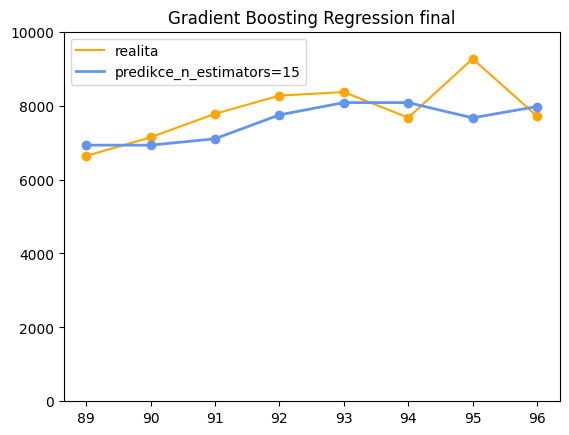

In [7]:
%%time 
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

#>> Cross-validation step: Split data into K-folds
from sklearn.model_selection import KFold
kf = KFold(n_splits=10) # Split data into folds

# Loop over the splits (each time train on all but one fold, test on the other)
for train_index, test_index in kf.split(df):
    df_train = df.iloc[train_index]
    df_test = df.iloc[test_index]
    df_test_graf = df_test
    
    #@ parametry
    parametry = ['aktivni-1', "nove-1", "zbytek-1"]
    #>> dataframy
    X = df[parametry]
    y = df['aktivni']
    X_train = df_train[parametry]
    y_train =  df_train["aktivni"]
    X_test = df_test[parametry]
    y_test = df_test['aktivni']
    #>>PCA
    #TODO zkusit implementovat PCA dokumentace na sk learn: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
    #//parametry = ['aktivni-1', 'nove-1','zbytek-1']
    #//pca = PCA(n_components=2)
    #//pca.fit(df[parametry])
    #//keep = pca.get_feature_names_out(df[parametry])
    #//print(keep)
    #//pca_X = pca.fit_transform(X)
    #//display(X)
    #//display(pca_X)
    #>> trenink
    n_estimators = 15
    gbr = GradientBoostingRegressor(n_estimators=n_estimators, loss='absolute_error')
    
    #>> Fit on the training data
    gbr.fit(X_train, y_train)
    
    #>> evaluace
    y_pred = gbr.predict(X_test)

    #>>metriky
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    r2 = (metrics.r2_score(y_test, y_pred))*(metrics.r2_score(y_test, y_pred))
    
    #>> Print evaluation metrics for each fold
    print("R2:", r2)
    print("Root Mean Squared Error:", rmse)

#>> dotreninovatni modelu na vsech  train datech
gbr.fit(X_train,y_train)

#>> evaluace
y_pred = gbr.predict(X_test)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_n_estimators={n_estimators}", linewidth=2)
plt.title("Gradient Boosting Regression final")
plt.legend()
plt.ylim(0,10000)
#plt.show()
#>>metriky
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = (metrics.r2_score(y_test, y_pred))*(metrics.r2_score(y_test, y_pred))
print("final")
print("R2:", r2)
print("Root Mean Squared Error:", rmse)

Cross-validation scores: [ 0.31627258 -0.59019806  0.63296192  0.37369847  0.7941051 ]
Mean cross-validation score: 0.3053680028519924
Standard deviation of cross-validation scores: 0.4802100070126367


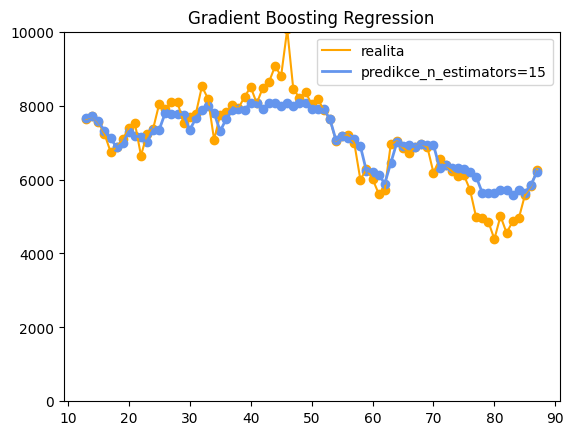

R2: 0.6686144633067211
Root Mean Squared Error: 502.13166623434915


In [18]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics
from sklearn.metrics import classification_report

df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df = df.drop(df.index[:13])
df = df.drop(df.index[-1:])

X = df[['aktivni-1', "nove-1", "zbytek-1"]]
y = df['aktivni']

X_test = X.drop(X.index[75:])
y_test = y.drop(y.index[75:])
X_train = X.drop(X.index[75:])
y_train = y.drop(y.index[75:])

# Instantiate the model with desired hyperparameters
gbr = GradientBoostingRegressor(n_estimators=15, loss='absolute_error')
gbr.fit(X_train,y_train)
# Perform cross-validation with 5 folds
scores = cross_val_score(gbr, X, y, cv=5)

# Print mean and standard deviation of scores
print("Cross-validation scores:", scores)
print("Mean cross-validation score:", np.mean(scores))
print("Standard deviation of cross-validation scores:", np.std(scores))

#>> evaluace
y_pred = gbr.predict(X_test)

#>> graf
plt.figure()
plt.scatter(X_test.index, y_test,c="orange")
plt.plot(X_test.index, y_test,c="orange", label="realita")
plt.scatter(X_test.index, y_pred, color="cornflowerblue")
plt.plot(X_test.index, y_pred, color="cornflowerblue", label=f"predikce_n_estimators={n_estimators}", linewidth=2)
plt.title("Gradient Boosting Regression")
plt.legend()
plt.ylim(0,10000)
plt.show()

#>>metriky
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2 = (metrics.r2_score(y_test, y_pred))*(metrics.r2_score(y_test, y_pred))
print("R2:", r2)
print("Root Mean Squared Error:", rmse)


    aktivni-1  nove-1  zbytek-1
97     7714.0  1674.0    5872.0


ValueError: x and y must have same first dimension, but have shapes (75,) and (8,)

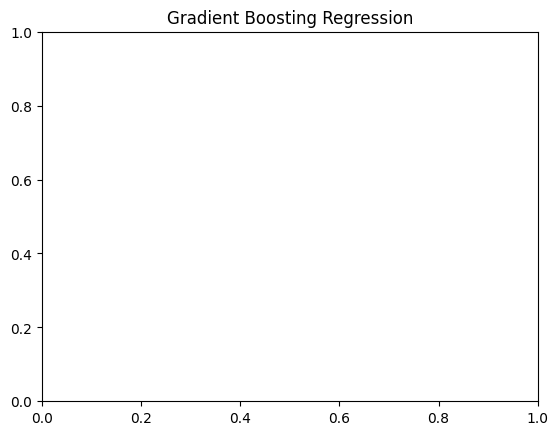

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_excel(fr"C:\Users\halik\OneDrive\development\github\sws\code\predictive modeling\funkcni\funcni data set - Copy.xlsx")
df_orig = df.drop(df.index[-12:])

df_new = df.drop(df.index[:-1])
print(df_new[parametry])
df_train = df.drop(df.index[-12:])

x_new = df_new[parametry]
#>> predikce
y_new_pred = gbr.predict(x_new)
#>> graf
plt.figure()
plt.title("Gradient Boosting Regression")
#* realita
plt.plot(X_test.index, df_test['aktivni'],label="aktivni",color="blue")
plt.scatter(X_test.index, df_test['aktivni'],color="blue")
#* predikce
plt.scatter(x_new.index, y_new_pred, label='predikce', color="green")
plt.scatter(x_new.index, y_new_pred - rmse, label="min", color="orange")
plt.scatter(x_new.index, y_new_pred + rmse, label="max", color="red")
plt.legend()
plt.ylim(0,10000)
plt.show()
#>> print
print(f"""
Model:      {gbr}
Min:        {int(y_new_pred-rmse)}
Predikce:   {int(y_new_pred)}
Max:        {int(y_new_pred+rmse)}
Rmse:       {int(rmse)}
""")